In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 14px;
font-family: consolas;
</style>

# (1) Discover and visualise the data


In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd

# Train Dataset
train_data = pd.read_csv('UNSW_NB15_training-set.csv')
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [2]:
# Test Dataset
test_data = pd.read_csv('UNSW_NB15_testing-set.csv')
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
train_data.shape

(82332, 45)

In [4]:
test_data.shape

(175341, 45)

### (1-1) Check whether dataset has null values


In [5]:
train_data.info()
# all features are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

### (1-2) Check whether dataset has duplicates or null values

In [6]:
test_data.duplicated().sum()
# no duplicated values

0

In [7]:
train_data.isnull().sum()
# no null values found

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
test_data.isnull().sum()
# no null values found

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

# Target 2 : attack_cat

### (1-3) Handle categorical variables (Target 2 : attack_cat)

In [9]:
from sklearn import preprocessing

train_d = pd.get_dummies(train_data, columns=['proto', 'service', 'state'])
test_d = pd.get_dummies(test_data, columns=['proto', 'service', 'state'])

### (1-4) Check correlation and rank in descending order

In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the data
le.fit(train_data['attack_cat'])

# # Transform the data
train_data['attack_cat'] = le.transform(train_data['attack_cat'])
test_data['attack_cat'] = le.transform(test_data['attack_cat'])

### (1-5) Keep 10 features with high correlation

In [11]:
corr_matrix_2 = train_data.corr(method='pearson').abs()
# Create a list of the top 10 correlated columns
top_10_cols = corr_matrix_2.sort_values(by='attack_cat', ascending=False).index[:13].tolist()
top_10_cols
# Drop all columns except for the top 10
train_data_copy_2 = train_data
train_data_copy_2 = train_data.drop(columns=[col for col in train_data.columns if col not in top_10_cols])
train_data_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            82332 non-null  int64  
 1   rate          82332 non-null  float64
 2   sttl          82332 non-null  int64  
 3   sload         82332 non-null  float64
 4   dload         82332 non-null  float64
 5   sinpkt        82332 non-null  float64
 6   swin          82332 non-null  int64  
 7   stcpb         82332 non-null  int64  
 8   dtcpb         82332 non-null  int64  
 9   dwin          82332 non-null  int64  
 10  ct_state_ttl  82332 non-null  int64  
 11  attack_cat    82332 non-null  int32  
 12  label         82332 non-null  int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 7.9 MB


### Drop column 'id' due to unique values

In [12]:
# Test dataset
# Drop all c#olumns except for the top 10
test_data_copy_2 = test_data
test_data_copy_2 = test_data_copy_2.drop(columns=[col for col in test_data.columns if col not in top_10_cols])
test_data_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            175341 non-null  int64  
 1   rate          175341 non-null  float64
 2   sttl          175341 non-null  int64  
 3   sload         175341 non-null  float64
 4   dload         175341 non-null  float64
 5   sinpkt        175341 non-null  float64
 6   swin          175341 non-null  int64  
 7   stcpb         175341 non-null  int64  
 8   dtcpb         175341 non-null  int64  
 9   dwin          175341 non-null  int64  
 10  ct_state_ttl  175341 non-null  int64  
 11  attack_cat    175341 non-null  int32  
 12  label         175341 non-null  int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 16.7 MB


### (1-6) Plot data after dropping columns

<AxesSubplot:>

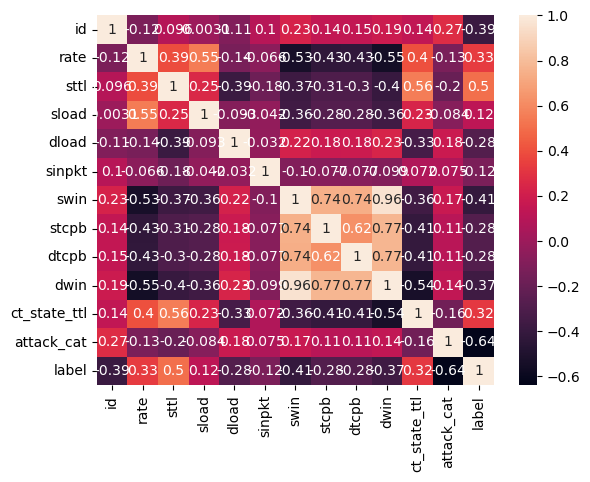

In [13]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(train_data_copy_2.corr(), annot=True)

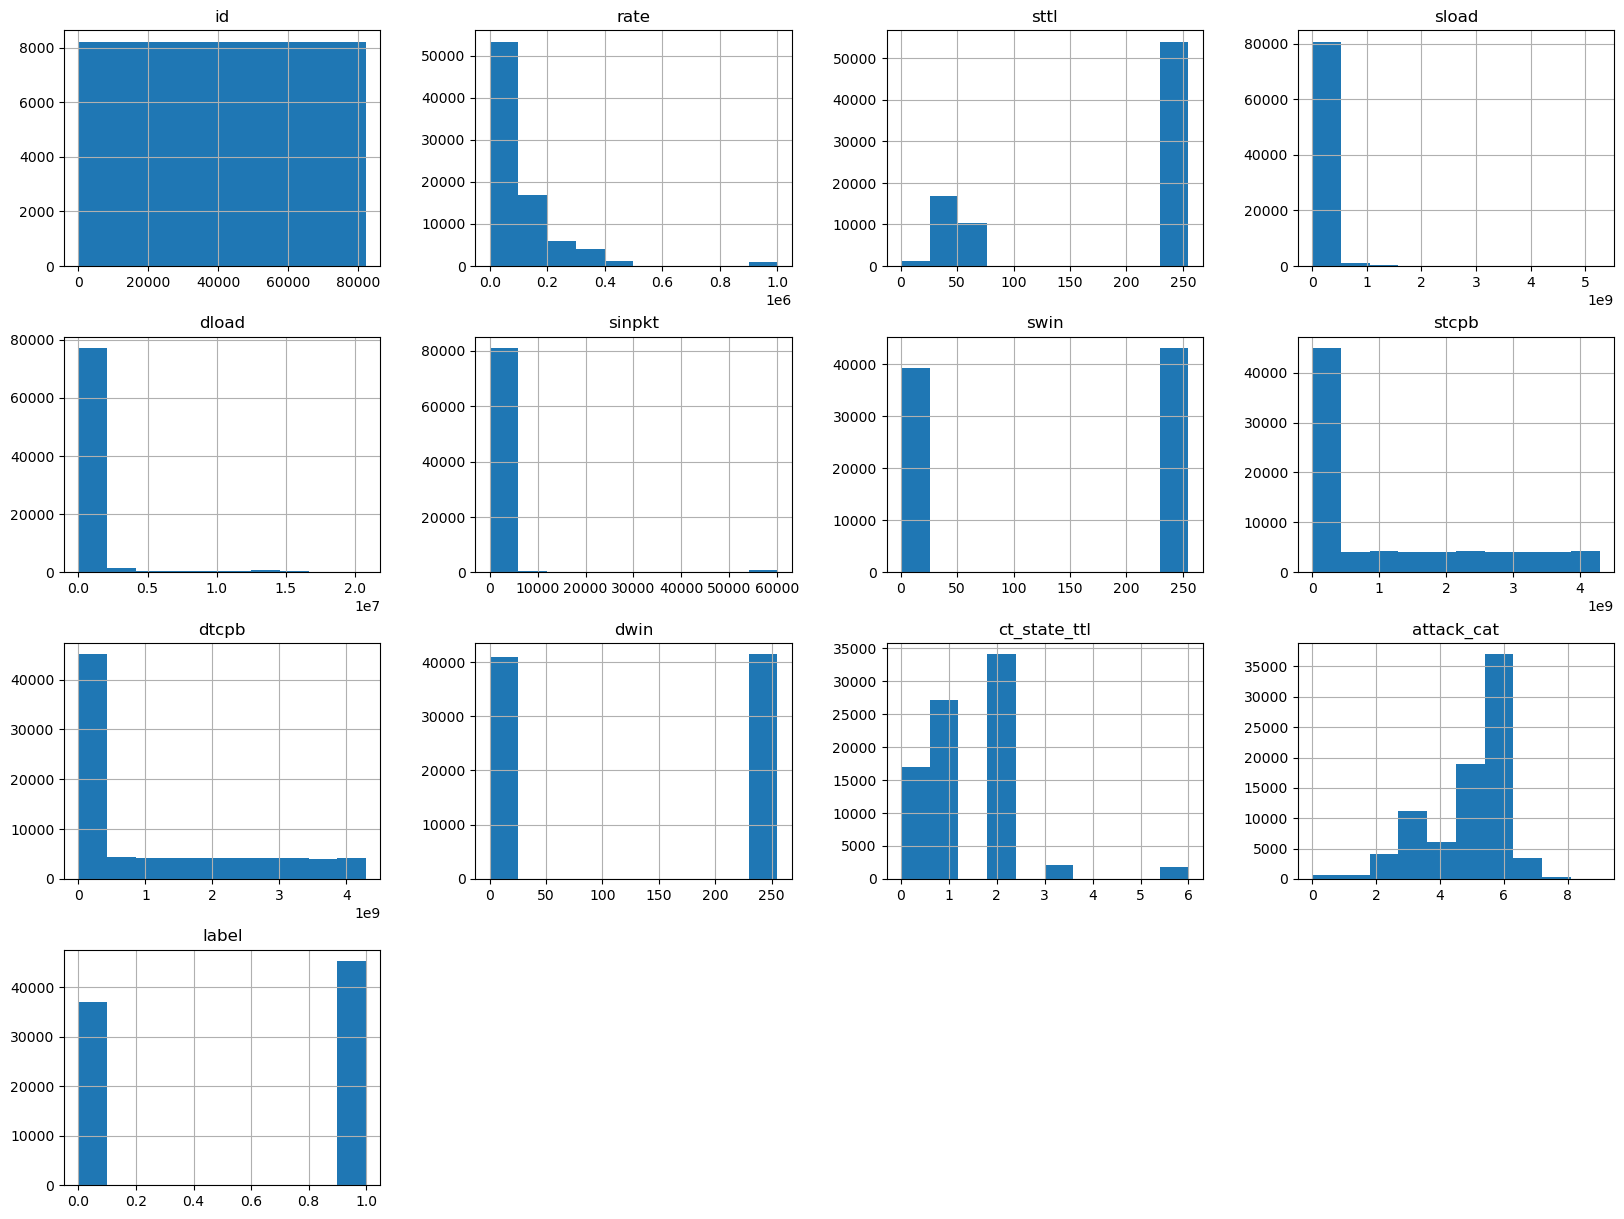

In [14]:
# Visualize the attributes of train dataset
train_data_copy_2.hist(bins=10, figsize=(20,15))
plt.show()

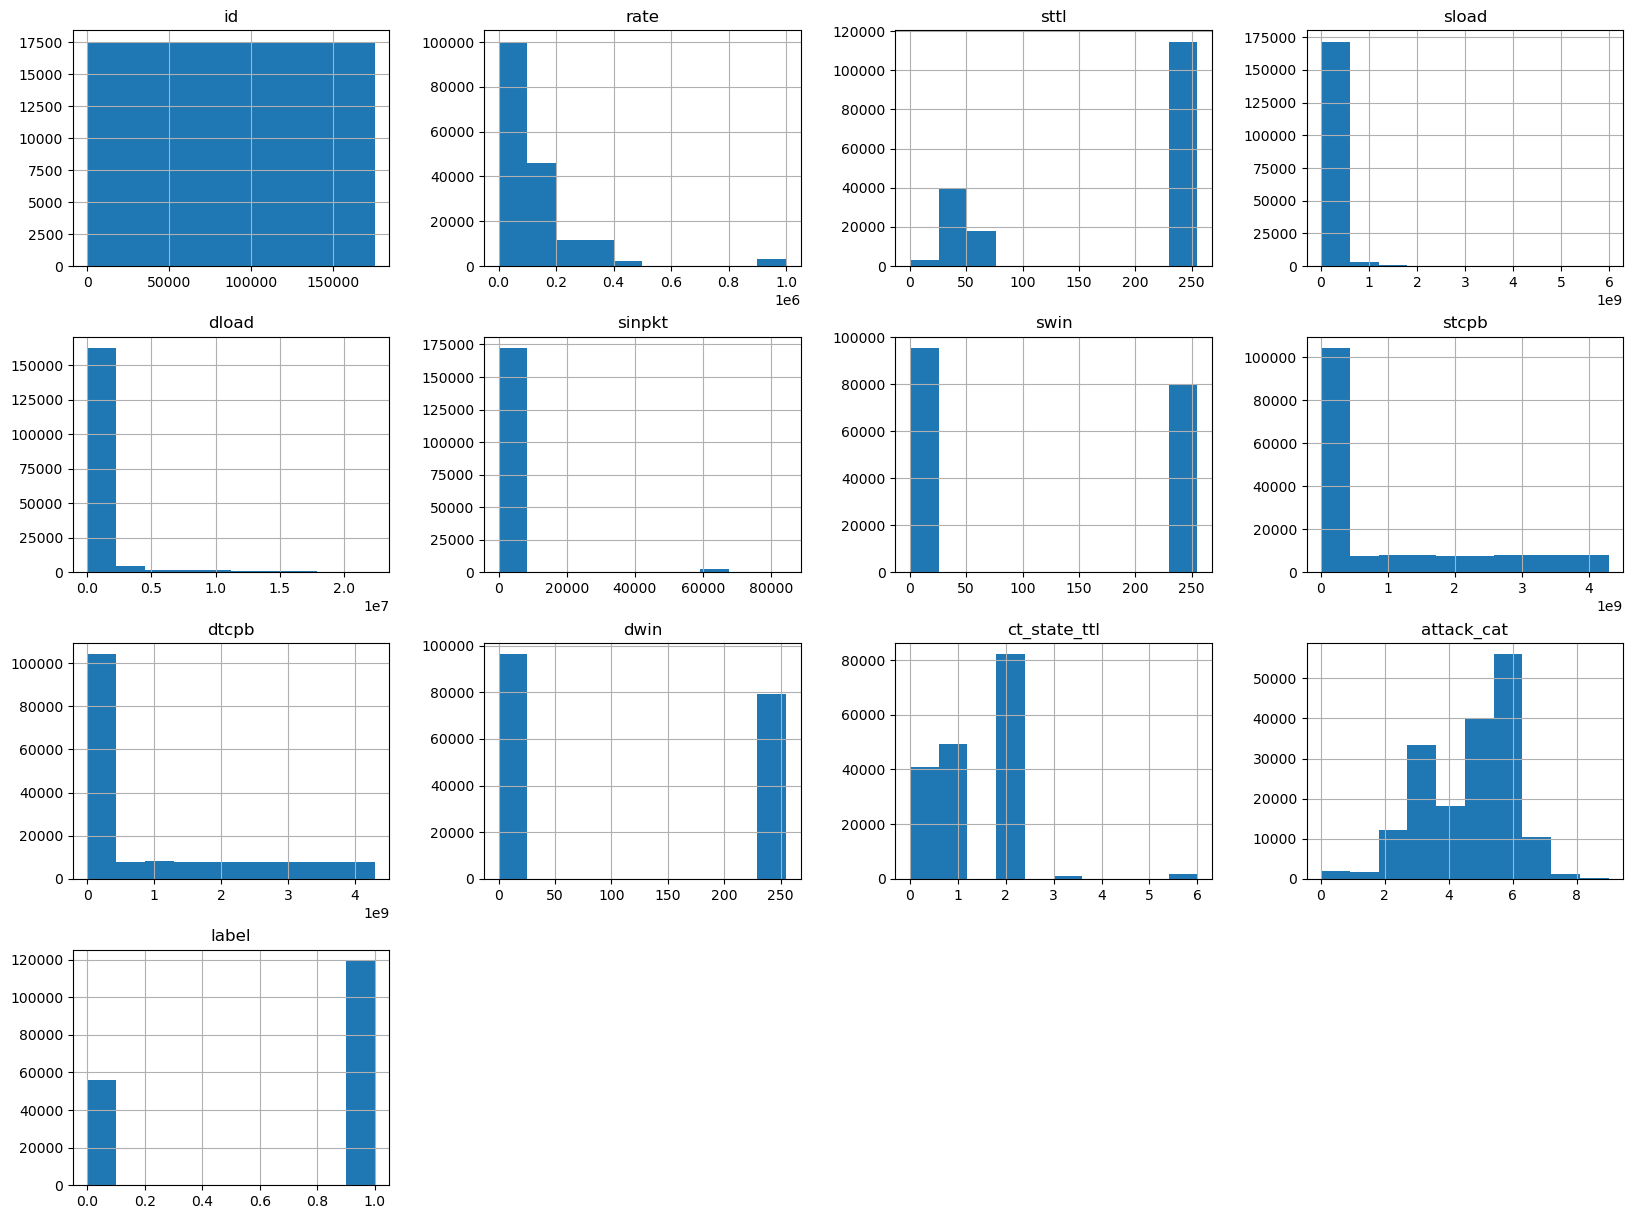

In [15]:
# Visualize the attributes of train dataset
test_data_copy_2.hist(bins=10, figsize=(20,15))
plt.show()

In [32]:
train_data_copy_2.drop(['id'], axis='columns', inplace=True)

In [33]:
train_data_copy_2.columns

Index(['rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb',
       'dwin', 'ct_state_ttl', 'attack_cat', 'label'],
      dtype='object')

In [17]:
test_data_copy_2.drop(['id'], axis='columns', inplace=True)

In [18]:
test_data_copy_2.columns

Index(['rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb',
       'dwin', 'ct_state_ttl', 'attack_cat', 'label'],
      dtype='object')

# (2) Prepare the data for machine learning algorithms

In [19]:
PredictorColumns = ['rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb',
       'dwin', 'ct_state_ttl']

TargetColumn_2 = 'attack_cat'

X_train = train_data_copy_2.loc[:, PredictorColumns]
y_train = train_data_copy_2.loc[:, TargetColumn_2]

X_test = test_data_copy_2.loc[:, PredictorColumns]
y_test = test_data_copy_2.loc[:, TargetColumn_2]


# -----------------------------------------------------------------------------------------------------------


# K-Nearest Neighbor Classifier

# (3) Select and train models and print outcomes (Before fine-tuning)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier(n_neighbors = 5)
KNN = KNNclf.fit(X_train, y_train)
KNN_prediction = KNN.predict(X_test)

Accuracy: 62.26%
Precision: 37.55%
Recall: 32.07%
F1 Score: 31.57%

[[   84     2  1139   314    55    11   391     4     0     0]
 [   77    10  1083   257    55    12   247     4     1     0]
 [  609    51  7228  1930   357   128  1886    58    17     0]
 [  788   100  9962  7477  1822   198 12831   198    17     0]
 [   99    57  1973  3648  2439   128  9652   152    36     0]
 [    2     0   233   187    60 39029   434    54     1     0]
 [   17    14   544  3766  2014   113 49365   153    14     0]
 [  126    18  1399  1730   428    69  3207  3512     2     0]
 [   11     2    46   199   185    34   611    23    22     0]
 [    2     0     1    32    21     1    72     0     1     0]]
              precision    recall  f1-score   support

           0       0.05      0.04      0.04      2000
           1       0.04      0.01      0.01      1746
           2       0.31      0.59      0.40     12264
           3       0.38      0.22      0.28     33393
           4       0.33      0

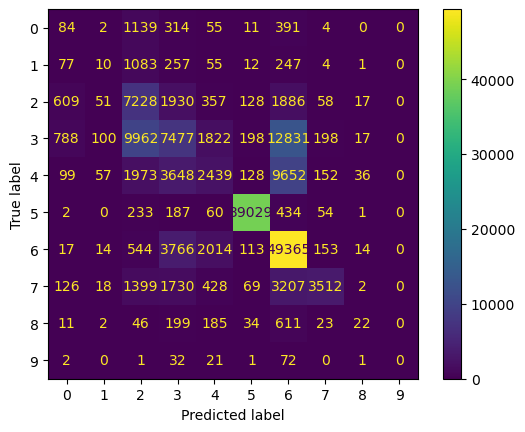

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, KNN_prediction)
precision = precision_score(y_test, KNN_prediction, average='macro')
recall = recall_score(y_test, KNN_prediction, average='macro')
f1 = f1_score(y_test, KNN_prediction, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print("F1 Score: {:.2f}%" .format(f1*100))
print()

# Print the confusion matrix
print(confusion_matrix(y_test, KNN_prediction))
# Print the classification report
print(classification_report(y_test, KNN_prediction))

import matplotlib.pyplot as plt

# Visualize confusion matrix 
cm = confusion_matrix(y_test, KNN_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()
plt.show()

# (4) Fine-tuning Model using GridSearch CV


In [28]:
KNNclf = KNeighborsClassifier(n_neighbors = 7)
KNN = KNNclf.fit(X_train, y_train)
KNN_prediction = KNN.predict(X_test)

# (5) Evaluate the outcomes (After fine-tuning)

In [29]:
accuracy = accuracy_score(y_test, KNN_prediction)
precision = precision_score(y_test, KNN_prediction, average='macro')
recall = recall_score(y_test, KNN_prediction, average='macro')
f1 = f1_score(y_test, KNN_prediction, average='macro')

    

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print("F1 Score: {:.2f}%" .format(f1*100))

print()

# Print the confusion matrix
print(confusion_matrix(y_test, KNN_prediction))
# Print the classification report
print(classification_report(y_test, KNN_prediction))

Accuracy: 62.67%
Precision: 38.65%
Recall: 31.60%
F1 Score: 30.95%

[[    3     3  1136   372    53    13   418     2     0     0]
 [    3     4  1085   326    46    11   266     5     0     0]
 [   29    26  7227  2463   281   111  2077    44     6     0]
 [   37    46  9843  7710  1382   156 14085   129     5     0]
 [    8    47  2143  3520  2165   116 10082    82    21     0]
 [    0     0   230   179    47 39025   516     2     1     0]
 [    0     2   587  3366  1608   103 50238    90     6     0]
 [    7     6  1356  1707   305    64  3550  3496     0     0]
 [    1     1    56   172   148    39   678    25    13     0]
 [    0     0     3    37    12     1    75     2     0     0]]
              precision    recall  f1-score   support

           0       0.03      0.00      0.00      2000
           1       0.03      0.00      0.00      1746
           2       0.31      0.59      0.40     12264
           3       0.39      0.23      0.29     33393
           4       0.36      0

# Random Forest

# (3) Select and train models and print outcomes (Before fine-tuning)

In [30]:
from sklearn.metrics import accuracy_score

print("Best Parameters for label: k = 7")
print("Test Score for label: ", accuracy_score(y_test, KNN_prediction))

Best Parameters for label: k = 7
Test Score for label:  0.6266703166971787


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def random_forest_regression(train_data, test_data):
    # Extract the feature columns and label column from the train and test data
    X_train = train_data.drop(columns=['attack_cat'])
    y_train = train_data['attack_cat']
    X_test = test_data.drop(columns=['attack_cat'])
    y_test = test_data['attack_cat']

    # Create a random forest regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the regressor on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf.predict(X_test)

    # Calculate the mean absolute error and mean squared error of the predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("r2 score:", r2)
    
random_forest_regression(train_data_copy_2, test_data_copy_2)

Mean Absolute Error: 0.349749031189623
Mean Squared Error: 0.7171831735286496
r2 score: 0.7083857783972837


# (4) Fine-tuning Model using GridSearch CV

In [35]:
from sklearn.model_selection import GridSearchCV
#Functions for performing grid search for attack_cat column
def perform_grid_search_attack_cat(X_train, y_train_attack_cat, X_test, y_test_attack_cat):
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train_attack_cat)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    test_score = grid_search.score(X_test, y_test_attack_cat)
    
    print("Best Parameters for attack_cat: ", best_params)
    print("Best CV Score for attack_cat: ", best_score)
    print("Test Score for attack_cat: ", test_score)

# (5) Evaluate the outcomes (After fine-tuning)

In [36]:
# Call the function for attack_cat

perform_grid_search_attack_cat(X_train, y_train, X_test, y_test)

Best Parameters for attack_cat:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
Best CV Score for attack_cat:  0.4663098181858656
Test Score for attack_cat:  0.5549443201050774


# Decision Tree

# (3) Select and train models and print outcomes (Before fine-tuning)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Measure the accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)
print("Accuracy: ", accuracy)

Precision:  0.7115555583673236
Recall:  0.7251070770669723
F1-Score:  0.7081778148946877
Accuracy:  0.7251070770669723


# (4) Fine-tuning Model using GridSearch CV

In [42]:
from sklearn.model_selection import RandomizedSearchCV


# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {'max_depth': np.arange(3, 11),
              'min_samples_split': np.arange(2, 11),
              'min_samples_leaf': np.arange(1, 11),
              'criterion': ['gini', 'entropy']}

# Create an instance of the RandomizedSearchCV class
random_search = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=20, random_state=0)

# Fit the random search to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   random_state=0)

# (5) Evaluate the outcomes (After fine-tuning)

In [43]:
# Print the best parameters and the best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 10, 'criterion': 'gini'}
Best score:  0.772663840392009


# Logistic Regression


# (3) Select and train models and print outcomes (Before fine-tuning)

Accuracy: 52.19%
Precision: 10.39%
Recall: 19.16%

[[    0     0     0     0     0  1430   570     0     0     0]
 [    0     0     0     0     0  1421   325     0     0     0]
 [    0     0     0     0     0  9774  2490     0     0     0]
 [    0     0     0     0     0 13241 20152     0     0     0]
 [    0     0     0     0     0  6340 11844     0     0     0]
 [    0     0     0     0     0 39499   501     0     0     0]
 [    0     0     0     0     0  3981 52019     0     0     0]
 [    0     0     0     0     0  5354  5137     0     0     0]
 [    0     0     0     0     0   576   557     0     0     0]
 [    0     0     0     0     0    15   115     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.00      0.00      0.00     12264
           3       0.00      0.00      0.00     33393
           4       0.00      0.00      0.00    

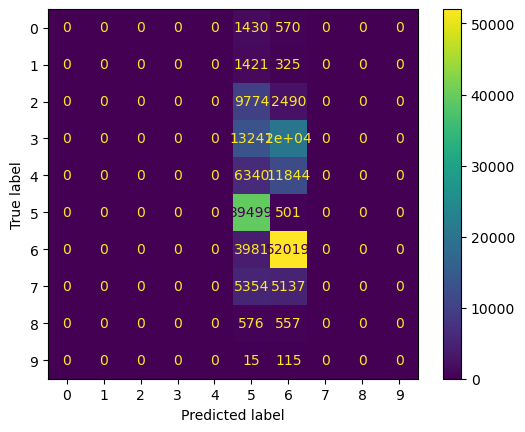

In [44]:
import scipy
from scipy.stats import spearmanr

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_prediction = LR.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, LR_prediction)
precision = precision_score(y_test, LR_prediction, average='macro')
recall = recall_score(y_test, LR_prediction, average='macro')  

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%" .format(precision *100))
print("Recall: {:.2f}%" .format(recall *100))
print()

# Print the confusion matrix
print(confusion_matrix(y_test, LR_prediction))
# Print the classification report
print(classification_report(y_test, LR_prediction))

import matplotlib.pyplot as plt

# Visualize confusion matrix 
cm = confusion_matrix(y_test, LR_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()
plt.show()

# (4) Fine-tuning Model using GridSearch CV

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, decomposition

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']

param_grid = dict(solver = solver_options, 
                  multi_class = multi_class_options, 
                  class_weight = class_weight_options)

grid = GridSearchCV(LR, param_grid, cv=12, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'class_weight': ['None', 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

# (5) Evaluate the outcomes (After fine-tuning)

In [46]:
best_params = grid.best_params_
best_score = grid.best_score_
test_score = grid.score(X_test, y_test)
    
print("Best Parameters for label: ", best_params)
print("Best CV Score for label: ", best_score)
print("Test Score for label: ", test_score)

Best Parameters for label:  {'class_weight': 'None', 'multi_class': 'ovr', 'solver': 'newton-cg'}
Best CV Score for label:  0.6300344944857407
Test Score for label:  0.5342903257081915
